In [1]:
# standard imports I always use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import pytz
import scipy
from pytz import common_timezones, all_timezones
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline
from datetime import datetime
import scipy as sp
import statsmodels.api as sm
import statsmodels.formula.api as smf
import mpld3
mpld3.enable_notebook()

In [2]:
import seerhelp

In [3]:
breastfiles = seerhelp.get_breastfiles()
print(breastfiles)

['SEER_1973_2013_TEXTDATA\\incidence\\yr1973_2013.seer9\\BREAST.TXT', 'inSEER_1973_2013_TEXTDATA\\incidence\\yr1992_2013.sj_la_rg_ak\\BREAST.TXT', 'SEER_1973_2013_TEXTDATA\\incidence\\yr2000_2013.ca_ky_lo_nj_ga\\BREAST.TXT', 'SEER_1973_2013_TEXTDATA\\incidence\\yr2005.lo_2nd_half\\BREAST.txt']


In [4]:
dfbreast0 = seerhelp.make_clean_dataframe(breastfiles[0],nrows=100000)

In [5]:
mask = (dfbreast0['CSTUMSIZ'] != "Unknown; size not stated; not stated in patient record") & \
 (dfbreast0['CSTUMSIZ'] != "Microscopic focus or foci only; no size of focus is given") & \
 (dfbreast0['CSTUMSIZ'] != "989 millimeters or larger") & \
 (dfbreast0['CSTUMSIZ'] != "Not applicable") & \
 (dfbreast0['AGE_DX'] != "Unknown age") & \
 (dfbreast0['srv_time_mon_flag'] == "Complete dates are available and there are more than 0 days of survival") & \
 (dfbreast0['REC_NO'] == 1) & \
 (dfbreast0['YEAR_DX'] >= 2004) & \
 (dfbreast0['CSTUMSIZ'] != "Described as less than 1 cm") & \
(dfbreast0['CSTUMSIZ'] != "Described as less than 2 cm") & \
(dfbreast0['CSTUMSIZ'] != "Described as less than 3 cm") & \
(dfbreast0['CSTUMSIZ'] != 'Indicates no msas or no tumor found; for example, when a tumor of a stated primary site is not found, but the tumor has metastasized') & \
(dfbreast0['CSTUMSIZ'] != "Described as less than 4 cm") & \
(dfbreast0['CSTUMSIZ'] != "Described as less than 5 cm") & \
(dfbreast0['CSTUMSIZ'] != "Not applicable")

In [6]:
dfsmall = dfbreast0[mask].copy()

In [7]:
dfsmall.set_index('PUBCSNUM',inplace=True)

In [8]:
dfbreast0.shape

C:\Users\ddooling\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\formatters.py:92: DeprecationWarning: DisplayFormatter._ipython_display_formatter_default is deprecated: use @default decorator instead.
  def _ipython_display_formatter_default(self):
C:\Users\ddooling\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\formatters.py:669: DeprecationWarning: PlainTextFormatter._singleton_printers_default is deprecated: use @default decorator instead.
  def _singleton_printers_default(self):


(99952, 141)

In [9]:
dfsmall.shape


(8555, 140)

In [10]:
catcols = ['SEX','MAR_STAT','RACEIV','NHIADE','GRADE','PRIMSITE',
          'LATERAL','HST_STGA','HISTREC','MDXRECMP','STAT_REC']

In [11]:
goodcols = ['SEX','MAR_STAT','RACEIV','NHIADE','GRADE','PRIMSITE',
          'LATERAL','HST_STGA','HISTREC','MDXRECMP','STAT_REC',
           'YR_BRTH','AGE_DX','YEAR_DX','CSTUMSIZ',
           'elevation','lat','lng']

In [12]:
resgood = pd.concat([pd.get_dummies(dfsmall[col],prefix=col) for col in catcols], axis=1)


In [13]:
resgood['YR_BRTH'] = dfsmall['YR_BRTH']
#resgood['number_of_primaries'] = dfsmall['number_of_primaries']
resgood['AGE_DX'] = dfsmall['AGE_DX']#resgood['sequence_number_central'] = dfsmall['sequence_number_central']
resgood['YEAR_DX'] = dfsmall['YEAR_DX']
#resgood['cs_tumor_size_ext_eval'] = dfsmall['cs_tumor_size_ext_eval']
resgood['CSTUMSIZ'] = dfsmall['CSTUMSIZ']
resgood['REC_NO'] = dfsmall['REC_NO']
resgood['elevation'] = dfsmall['elevation']
resgood['lat'] = dfsmall['lat']
resgood['lng'] = dfsmall['lng']
#resgood['month_of_diagnosis'] = dfsmall['number_month_of_diagnosis']
#resgood['PUBCSNUM'] = dfsmall['PUBCSNUM']
resgood['srv_time_mon'] = dfsmall['srv_time_mon']



print(resgood.shape)

(8555, 92)


In [14]:
resgood['STAT_REC_Dead'].value_counts()

0.0    6742
1.0    1813
Name: STAT_REC_Dead, dtype: int64

In [15]:
from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter()

T = resgood["srv_time_mon"]
E = resgood["STAT_REC_Dead"]

kmf.fit(T, event_observed=E)

<lifelines.KaplanMeierFitter: fitted with 8555 observations, 6742 censored>

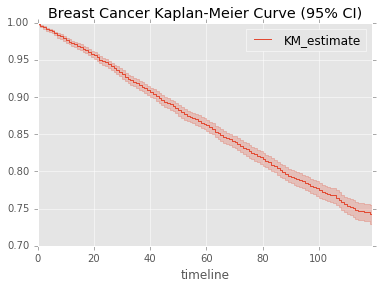

In [16]:
kmf.plot()
plt.title("Breast Cancer Kaplan-Meier Curve (95% CI)")


In [17]:
with pd.option_context('display.max_rows', 999, 'display.max_columns', 3):
    print(resgood.dtypes)

SEX_Female                                                                                                                   float64
SEX_Male                                                                                                                     float64
MAR_STAT_Divorced                                                                                                            float64
MAR_STAT_Married (including common law)                                                                                      float64
MAR_STAT_Separated                                                                                                           float64
MAR_STAT_Single (never married)                                                                                              float64
MAR_STAT_Unknown                                                                                                             float64
MAR_STAT_Widowed                                                     

In [18]:
newcolumns = list(resgood.columns)

In [19]:
list(newcolumns)

['SEX_Female',
 'SEX_Male',
 'MAR_STAT_Divorced',
 'MAR_STAT_Married (including common law)',
 'MAR_STAT_Separated',
 'MAR_STAT_Single (never married)',
 'MAR_STAT_Unknown',
 'MAR_STAT_Widowed',
 'RACEIV_American Indian, Aleutian, Alaska Native or Eskimo (includes all indigenous populations of the Western hemisphere)',
 'RACEIV_Asian Indian',
 'RACEIV_Asian Indian or Pakistani, NOS',
 'RACEIV_Black',
 'RACEIV_Chinese',
 'RACEIV_Filipino',
 'RACEIV_Japanese',
 'RACEIV_Korean',
 'RACEIV_Laotian',
 'RACEIV_New Guinean',
 'RACEIV_Other',
 'RACEIV_Other Asian, including Asian, NOS and Oriental NOS',
 'RACEIV_Pacific Islander, NOS',
 'RACEIV_Samoan',
 'RACEIV_Thai',
 'RACEIV_Unknown',
 'RACEIV_Vietnamese',
 'RACEIV_White',
 'NHIADE_Cuban',
 'NHIADE_Dominican Republic',
 'NHIADE_Mexican',
 'NHIADE_NHIA Surname Match Only',
 'NHIADE_Non-Spanish-Hispanic-Latino',
 'NHIADE_Other specified Spanish/Hispanic Origin including Europe',
 'NHIADE_Puerto Rican',
 'NHIADE_South or Central American exclud

In [20]:
newcolumns.remove('srv_time_mon')
newcolumns.remove('REC_NO')
newcolumns.remove('STAT_REC_Alive')
newcolumns.remove('STAT_REC_Dead')
newcolumns.remove('SEX_Female')

In [21]:
newcolumns

['SEX_Male',
 'MAR_STAT_Divorced',
 'MAR_STAT_Married (including common law)',
 'MAR_STAT_Separated',
 'MAR_STAT_Single (never married)',
 'MAR_STAT_Unknown',
 'MAR_STAT_Widowed',
 'RACEIV_American Indian, Aleutian, Alaska Native or Eskimo (includes all indigenous populations of the Western hemisphere)',
 'RACEIV_Asian Indian',
 'RACEIV_Asian Indian or Pakistani, NOS',
 'RACEIV_Black',
 'RACEIV_Chinese',
 'RACEIV_Filipino',
 'RACEIV_Japanese',
 'RACEIV_Korean',
 'RACEIV_Laotian',
 'RACEIV_New Guinean',
 'RACEIV_Other',
 'RACEIV_Other Asian, including Asian, NOS and Oriental NOS',
 'RACEIV_Pacific Islander, NOS',
 'RACEIV_Samoan',
 'RACEIV_Thai',
 'RACEIV_Unknown',
 'RACEIV_Vietnamese',
 'RACEIV_White',
 'NHIADE_Cuban',
 'NHIADE_Dominican Republic',
 'NHIADE_Mexican',
 'NHIADE_NHIA Surname Match Only',
 'NHIADE_Non-Spanish-Hispanic-Latino',
 'NHIADE_Other specified Spanish/Hispanic Origin including Europe',
 'NHIADE_Puerto Rican',
 'NHIADE_South or Central American excluding Brazil',
 '

In [22]:
resgreat = resgood[newcolumns].copy()

In [23]:
resgreat.head()

,SEX_Male,MAR_STAT_Divorced,MAR_STAT_Married (including common law),MAR_STAT_Separated,MAR_STAT_Single (never married),MAR_STAT_Unknown,MAR_STAT_Widowed,"RACEIV_American Indian, Aleutian, Alaska Native or Eskimo (includes all indigenous populations of the Western hemisphere)",RACEIV_Asian Indian,"RACEIV_Asian Indian or Pakistani, NOS",...,MDXRECMP_Nov,MDXRECMP_Oct,MDXRECMP_Sep,YR_BRTH,AGE_DX,YEAR_DX,CSTUMSIZ,elevation,lat,lng
PUBCSNUM,,,,,,,,,,,,,,,,,,,,,
7000091,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1946,65,2011,5,689.718,41.8419,-72.3785
7000138,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1926,78,2005,8,205.06,41.5185,-72.0468
7000314,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1932,77,2009,3,471.481,41.256,-73.3709
7000515,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1930,75,2006,12,471.481,41.256,-73.3709
7000790,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1936,74,2010,42,205.06,41.5185,-72.0468


In [24]:
resgreat['SEX_Male'].sum()

62.0

In [25]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize, StandardScaler
from sklearn.multiclass import OneVsRestClassifier

import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plot
#import psycopg2
import random
from sklearn import ensemble
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.cross_validation import StratifiedShuffleSplit
import pylab as plot
from pandas import DataFrame, Series
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import KFold
from sklearn.feature_extraction import DictVectorizer
from sklearn import feature_extraction
from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction import DictVectorizer as DV
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.grid_search import ParameterGrid
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
#from sklearn.neural_network import MultilayerPerceptronClassifier
from sklearn.neural_network import BernoulliRBM
from sklearn.svm import SVC
import pylab as pl
from sklearn.decomposition import RandomizedPCA
from itertools import cycle
from sklearn.cross_validation import ShuffleSplit
from scipy.stats import sem
from pprint import pprint
from math import sqrt, fabs, exp
import matplotlib.pyplot as plot
from sklearn.cross_validation import train_test_split
from sklearn import ensemble
from sklearn.metrics import roc_auc_score, roc_curve
import numpy
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from pandas.tools.plotting import lag_plot

In [32]:
y = resgood['SEX_Male'].copy()
yTrain = np.array(y)

In [28]:
del resgreat['SEX_Male']

In [33]:
resgreat.head()

,MAR_STAT_Divorced,MAR_STAT_Married (including common law),MAR_STAT_Separated,MAR_STAT_Single (never married),MAR_STAT_Unknown,MAR_STAT_Widowed,"RACEIV_American Indian, Aleutian, Alaska Native or Eskimo (includes all indigenous populations of the Western hemisphere)",RACEIV_Asian Indian,"RACEIV_Asian Indian or Pakistani, NOS",RACEIV_Black,...,MDXRECMP_Nov,MDXRECMP_Oct,MDXRECMP_Sep,YR_BRTH,AGE_DX,YEAR_DX,CSTUMSIZ,elevation,lat,lng
PUBCSNUM,,,,,,,,,,,,,,,,,,,,,
7000091,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1946,65,2011,5,689.718,41.8419,-72.3785
7000138,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1926,78,2005,8,205.06,41.5185,-72.0468
7000314,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1932,77,2009,3,471.481,41.256,-73.3709
7000515,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1930,75,2006,12,471.481,41.256,-73.3709
7000790,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1936,74,2010,42,205.06,41.5185,-72.0468


In [30]:
xTrain = resgreat.values

xTrain = StandardScaler().fit_transform(xTrain)
featurenames = resgreat.columns

C:\Users\ddooling\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ddooling\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [34]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize, StandardScaler
from sklearn.multiclass import OneVsRestClassifier

import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plot
#import psycopg2
import random
from sklearn import ensemble
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.cross_validation import StratifiedShuffleSplit
import pylab as plot
from pandas import DataFrame, Series
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import KFold
from sklearn.feature_extraction import DictVectorizer
from sklearn import feature_extraction
from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction import DictVectorizer as DV
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.grid_search import ParameterGrid
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
#from sklearn.neural_network import MultilayerPerceptronClassifier
from sklearn.neural_network import BernoulliRBM
from sklearn.svm import SVC
import pylab as pl
from sklearn.decomposition import RandomizedPCA
from itertools import cycle
from sklearn.cross_validation import ShuffleSplit
from scipy.stats import sem
from pprint import pprint
from math import sqrt, fabs, exp
import matplotlib.pyplot as plot
from sklearn.cross_validation import train_test_split
from sklearn import ensemble
from sklearn.metrics import roc_auc_score, roc_curve
import numpy
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from pandas.tools.plotting import lag_plot

In [35]:
from sklearn.tree import DecisionTreeClassifier

from sklearn import tree

clf_dt = tree.DecisionTreeClassifier(criterion='entropy',
                                     max_depth=10, min_samples_leaf=3)

In [36]:
clf_dt.fit(xTrain, yTrain)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=3,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [37]:
def measure_performance(X, y, clf, show_accuracy=True, show_classification_report=True, show_confusion_matrix=True):
    y_pred = clf.predict(X)
    if show_accuracy:
        print("Accuracy:{0:.3f}".format(metrics.accuracy_score(y, y_pred)), "\n")
    if show_classification_report:
        print("Classification report")
        print(metrics.classification_report(y, y_pred), "\n")
    if show_confusion_matrix:
        print("Confusion matrix")
        print(metrics.confusion_matrix(y, y_pred), "\n")

In [38]:
measure_performance(xTrain, yTrain, clf_dt)

Accuracy:0.994 

Classification report
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00      8493
        1.0       0.71      0.35      0.47        62

avg / total       0.99      0.99      0.99      8555
 

Confusion matrix
[[8484    9]
 [  40   22]] 



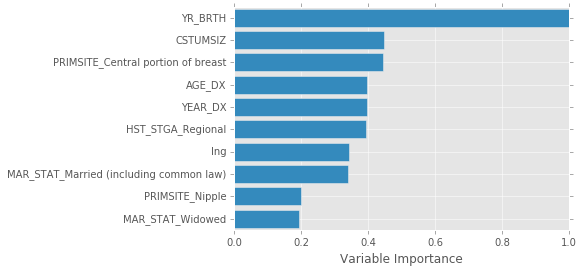

In [39]:
# Plot feature importance
featureImportance = clf_dt.feature_importances_

# normalize by max importance
featureImportance = featureImportance / featureImportance.max()

#plot variable importance
idxSorted = numpy.argsort(featureImportance)[-10:]
barPos = numpy.arange(idxSorted.shape[0]) + .5
plot.barh(barPos, featureImportance[idxSorted], align='center')
plot.yticks(barPos, featurenames[idxSorted])
plot.xlabel('Variable Importance')
plot.show()

In [40]:
featurenames[idxSorted]

Index(['MAR_STAT_Widowed', 'PRIMSITE_Nipple',
       'MAR_STAT_Married (including common law)', 'lng', 'HST_STGA_Regional',
       'YEAR_DX', 'AGE_DX', 'PRIMSITE_Central portion of breast', 'CSTUMSIZ',
       'YR_BRTH'],
      dtype='object')

In [42]:
dfsmall['PRIMSITE'][dfsmall['SEX'] == 'Male'].value_counts()

Central portion of breast         18
Breast, NOS                       17
Overlapping lesion of breast      11
Upper-outer quadrant of breast     9
Nipple                             6
Lower-inner quadrant of breast     1
Name: PRIMSITE, dtype: int64

In [43]:
yTrain.sum()

62.0

In [44]:
fpr, tpr, thresh = roc_curve(yTrain, list(clf_dt.predict_proba(xTrain)[:,1:2]))

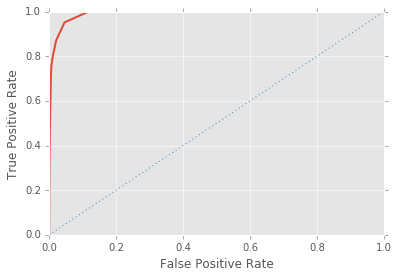

In [45]:
ctClass = [i*0.01 for i in range(101)]

plot.plot(fpr, tpr, linewidth=2)
plot.plot(ctClass, ctClass, linestyle=':')
plot.xlabel('False Positive Rate')
plot.ylabel('True Positive Rate')
plot.show()


In [46]:
aucCalc = roc_auc_score(yTrain, clf_dt.predict_proba(xTrain)[:,1:2])

print("AUC: ", aucCalc)

AUC:  0.990438045753


In [47]:
def Match(groups, propensity, caliper = 0.05, caliper_method = "propensity", replace = False):
    ''' 
    Implements greedy one-to-one matching on propensity scores.
    
    Inputs:
    groups = Array-like object of treatment assignments.  Must be 2 groups
    propensity = Array-like object containing propensity scores for each observation. Propensity and groups should be in the same order (matching indices)
    caliper = a numeric value, specifies maximum distance (difference in propensity scores or SD of logit propensity) 
    caliper_method = a string: "propensity" (default) if caliper is a maximum difference in propensity scores,
            "logit" if caliper is a maximum SD of logit propensity, or "none" for no caliper
    replace = Logical for whether individuals from the larger group should be allowed to match multiple individuals in the smaller group.
        (default is False)
    
    Output:
    A series containing the individuals in the control group matched to the treatment group.
    Note that with caliper matching, not every treated individual may have a match.
    '''

    # Check inputs
    if any(propensity <= 0) or any(propensity >= 1):
        raise ValueError('Propensity scores must be between 0 and 1')
    elif not(0<=caliper<1):
        if caliper_method == "propensity" and caliper>1:
            raise ValueError('Caliper for "propensity" method must be between 0 and 1')
        elif caliper<0:
            raise ValueError('Caliper cannot be negative')
    elif len(groups)!= len(propensity):
        raise ValueError('groups and propensity scores must be same dimension')
    elif len(groups.unique()) != 2:
        raise ValueError('wrong number of groups: expected 2')
        
    
    # Transform the propensity scores and caliper when caliper_method is "logit" or "none"
    if caliper_method == "logit":
        propensity = log(propensity/(1-propensity))
        caliper = caliper*np.std(propensity)
    elif caliper_method == "none":
        caliper = 0
    
    # Code groups as 0 and 1
    groups = groups == groups.unique()[0]
    N = len(groups)
    N1 = groups[groups == 1].index; N2 = groups[groups == 0].index
    g1, g2 = propensity[groups == 1], propensity[groups == 0]
    # Check if treatment groups got flipped - the smaller should correspond to N1/g1
    if len(N1) > len(N2):
       N1, N2, g1, g2 = N2, N1, g2, g1
        
        
    # Randomly permute the smaller group to get order for matching
    morder = np.random.permutation(N1)
    matches = {}

    
    for m in morder:
        dist = abs(g1[m] - g2)
        if (dist.min() <= caliper) or not caliper:
            matches[m] = dist.argmin()    # Potential problem: check for ties
            if not replace:
                g2 = g2.drop(matches[m])
    return (matches)



def MatchMany(groups, propensity, method = "caliper", k = 1, caliper = 0.05, caliper_method = "propensity", replace = True):
    ''' 
    Implements greedy one-to-many matching on propensity scores.
    
    Inputs:
    groups = Array-like object of treatment assignments.  Must be 2 groups
    propensity = Array-like object containing propensity scores for each observation. Propensity and groups should be in the same order (matching indices)
    method = a string: "caliper" (default) to select all matches within a given range, "knn" for k nearest neighbors,
    k = an integer (default is 1). If method is "knn", this specifies the k in k nearest neighbors
    caliper = a numeric value, specifies maximum distance (difference in propensity scores or SD of logit propensity) 
    caliper_method = a string: "propensity" (default) if caliper is a maximum difference in propensity scores,
            "logit" if caliper is a maximum SD of logit propensity, or "none" for no caliper
    replace = Logical for whether individuals from the larger group should be allowed to match multiple individuals in the smaller group.
        (default is True)
    
    Output:
    A series containing the individuals in the control group matched to the treatment group.
    Note that with caliper matching, not every treated individual may have a match within calipers.
        In that case we match it to its single nearest neighbor.  The alternative is to throw out individuals with no matches, but then we'd no longer be estimating the ATT.
    '''

    # Check inputs
    if any(propensity <= 0) or any(propensity >= 1):
        raise ValueError('Propensity scores must be between 0 and 1')
    elif not(0<=caliper<1):
        if caliper_method == "propensity" and caliper>1:
            raise ValueError('Caliper for "propensity" method must be between 0 and 1')
        elif caliper<0:
            raise ValueError('Caliper cannot be negative')
    elif len(groups)!= len(propensity):
        raise ValueError('groups and propensity scores must be same dimension')
    elif len(groups.unique()) != 2:
        raise ValueError('wrong number of groups: expected 2')
        
    
    # Transform the propensity scores and caliper when caliper_method is "logit" or "none"
    if method == "caliper":
        if caliper_method == "logit":
            propensity = log(propensity/(1-propensity))
            caliper = caliper*np.std(propensity)
        elif caliper_method == "none":
            caliper = 0
    
    # Code groups as 0 and 1
    groups = groups == groups.unique()[0]
    N = len(groups)
    N1 = groups[groups == 1].index; N2 = groups[groups == 0].index
    g1, g2 = propensity[groups == 1], propensity[groups == 0]
    # Check if treatment groups got flipped - the smaller should correspond to N1/g1
    if len(N1) > len(N2):
       N1, N2, g1, g2 = N2, N1, g2, g1
        
        
    # Randomly permute the smaller group to get order for matching
    morder = np.random.permutation(N1)
    matches = {}
    
    for m in morder:
        dist = abs(g1[m] - g2)
        dist.sort_values()
        if method == "knn":
            caliper = dist.iloc[k-1]
        # PROBLEM: when there are ties in the knn. 
        # Need to randomly select among the observations tied for the farthest eacceptable distance
        keep = np.array(dist[dist<=caliper].index)
        if len(keep):
            matches[m] = keep
        else:
            matches[m] = [dist.argmin()]
        if not replace:
            g2 = g2.drop(matches[m])
    return (matches)

In [48]:
def whichMatched(matches, data, many = False, unique = False):
    ''' 
    Simple function to convert output of Matches to DataFrame of all matched observations
    Inputs:
    matches = output of Match
    data = DataFrame of covariates
    many = Boolean indicating if matching method is one-to-one or one-to-many
    unique = Boolean indicating if duplicated individuals (ie controls matched to more than one case) should be removed
    '''

    tr = matches.keys()
    if many:
        ctrl = [m for matchset in matches.values() for m in matchset]
    else:
        ctrl = matches.values()
    # need to remove duplicate rows, which may occur in matching with replacement
    temp = pd.concat([data.ix[tr], data.ix[ctrl]])
    if unique == True:
        return temp.groupby(temp.index).first()
    else:
        return temp

In [49]:
def Balance(groups, covariates):
    '''
    Computes absolute difference of means and standard error for covariates by group
    '''
    means = covariates.groupby(groups).mean()
    dist = abs(means.diff()).ix[1]
    std = covariates.groupby(groups).std()
    n = groups.value_counts()
    se = std.apply(lambda s: np.sqrt(s[0]**2/n[0] + s[1]**2/n[1]))
    return dist, se

def plotScores(groups, propensity, matches, many=True):
    '''
    Plot density of propensity scores for each group before and after matching
    
    Inputs: groups = treatment assignment, pre-matching
            propensity = propensity scores, pre-matching
            matches = output of Match or MatchMany
            many = indicator - True if one-many matching was done (default is True), otherwise False
    '''
    pre = pd.DataFrame({'groups':groups, 'propensity':propensity})    
    post = whichMatched(matches, pre, many = many, unique = False)
    
    plt.figure(1)
    plt.subplot(121)
    density0 = scipy.stats.gaussian_kde(pre.propensity[pre.groups==0])
    density1 = scipy.stats.gaussian_kde(pre.propensity[pre.groups==1])
    xs = np.linspace(0,1,1000)
    #density0.covariance_factor = lambda : 0.5
    #density0._compute_covariance()
    #density1.covariance_factor = lambda : 0.5
    #density1._compute_covariance()
    plt.plot(xs,density0(xs),color='black')
    plt.fill_between(xs,density1(xs),color='gray')
    plt.title('Before Matching')
    plt.xlabel('Propensity Score')
    plt.ylabel('Density')
    
    plt.subplot(122)
    density0_post = scipy.stats.gaussian_kde(post.propensity[post.groups==0])
    density1_post = scipy.stats.gaussian_kde(post.propensity[post.groups==1])
    xs = np.linspace(0,1,1000)
    #density0.covariance_factor = lambda : 0.5
    #density0._compute_covariance()
    #density1.covariance_factor = lambda : 0.5
    #density1._compute_covariance()
    plt.plot(xs,density0_post(xs),color='black')
    plt.fill_between(xs,density1_post(xs),color='gray')
    plt.title('After Matching')
    plt.xlabel('Propensity Score')
    plt.ylabel('Density')
    plt.show()

In [50]:

from sklearn.ensemble import RandomForestClassifier

In [71]:
rf = RandomForestClassifier(n_estimators=650,min_samples_split=3,
                             max_depth = 50,
                            max_features = .9,
                             n_jobs=5,verbose=2,random_state=3)

In [72]:
rf = rf.fit(xTrain, yTrain)

building tree 1 of 650building tree 2 of 650
building tree 3 of 650

building tree 4 of 650
building tree 5 of 650
building tree 6 of 650
building tree 7 of 650
building tree 8 of 650
building tree 9 of 650
building tree 10 of 650
building tree 11 of 650
building tree 12 of 650
building tree 13 of 650
building tree 14 of 650
building tree 15 of 650
building tree 16 of 650
building tree 17 of 650
building tree 18 of 650
building tree 19 of 650
building tree 20 of 650
building tree 21 of 650
building tree 22 of 650
building tree 23 of 650
building tree 24 of 650
building tree 25 of 650
building tree 26 of 650
building tree 27 of 650
building tree 28 of 650
building tree 29 of 650
building tree 30 of 650
building tree 31 of 650
building tree 32 of 650
building tree 33 of 650
building tree 34 of 650
building tree 35 of 650
building tree 36 of 650
building tree 37 of 650
building tree 38 of 650
building tree 39 of 650
building tree 40 of 650
building tree 41 of 650
building tree 42 of 650
b

[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:    0.1s


building tree 47 of 650
building tree 48 of 650
building tree 49 of 650
building tree 50 of 650
building tree 51 of 650
building tree 52 of 650
building tree 53 of 650
building tree 54 of 650
building tree 55 of 650
building tree 56 of 650
building tree 57 of 650
building tree 58 of 650
building tree 59 of 650
building tree 60 of 650
building tree 61 of 650
building tree 62 of 650
building tree 63 of 650
building tree 64 of 650
building tree 65 of 650
building tree 66 of 650
building tree 67 of 650
building tree 68 of 650
building tree 69 of 650
building tree 70 of 650
building tree 71 of 650
building tree 72 of 650
building tree 73 of 650
building tree 74 of 650
building tree 75 of 650
building tree 76 of 650
building tree 77 of 650
building tree 78 of 650
building tree 79 of 650
building tree 80 of 650
building tree 81 of 650
building tree 82 of 650
building tree 83 of 650
building tree 84 of 650
building tree 85 of 650
building tree 86 of 650
building tree 87 of 650
building tree 88

[Parallel(n_jobs=5)]: Done 152 tasks      | elapsed:    0.6s


building tree 194 of 650
building tree 195 of 650
building tree 196 of 650
building tree 197 of 650
building tree 198 of 650
building tree 199 of 650
building tree 200 of 650
building tree 201 of 650
building tree 202 of 650
building tree 203 of 650
building tree 204 of 650
building tree 205 of 650
building tree 206 of 650
building tree 207 of 650
building tree 208 of 650
building tree 209 of 650
building tree 210 of 650
building tree 211 of 650
building tree 212 of 650
building tree 213 of 650
building tree 214 of 650
building tree 215 of 650
building tree 216 of 650
building tree 217 of 650
building tree 218 of 650
building tree 219 of 650
building tree 220 of 650
building tree 221 of 650
building tree 222 of 650
building tree 223 of 650
building tree 224 of 650
building tree 225 of 650
building tree 226 of 650
building tree 227 of 650
building tree 228 of 650
building tree 229 of 650
building tree 230 of 650
building tree 231 of 650
building tree 232 of 650
building tree 233 of 650


[Parallel(n_jobs=5)]: Done 355 tasks      | elapsed:    1.5s


building tree 382 of 650
building tree 383 of 650
building tree 384 of 650
building tree 385 of 650
building tree 386 of 650
building tree 387 of 650
building tree 388 of 650
building tree 389 of 650
building tree 390 of 650
building tree 391 of 650
building tree 392 of 650
building tree 393 of 650
building tree 394 of 650
building tree 395 of 650
building tree 396 of 650
building tree 397 of 650
building tree 398 of 650
building tree 399 of 650
building tree 400 of 650
building tree 401 of 650
building tree 402 of 650
building tree 403 of 650
building tree 404 of 650
building tree 405 of 650
building tree 406 of 650
building tree 407 of 650
building tree 408 of 650
building tree 409 of 650
building tree 410 of 650
building tree 411 of 650
building tree 412 of 650
building tree 413 of 650
building tree 414 of 650
building tree 415 of 650
building tree 416 of 650
building tree 417 of 650
building tree 418 of 650
building tree 419 of 650
building tree 420 of 650
building tree 421 of 650


[Parallel(n_jobs=5)]: Done 638 tasks      | elapsed:    2.8s
[Parallel(n_jobs=5)]: Done 650 out of 650 | elapsed:    2.8s finished


In [73]:
rf.verbose = False

In [74]:
measure_performance(xTrain, yTrain, rf)

Accuracy:1.000 

Classification report
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00      8493
        1.0       1.00      0.98      0.99        62

avg / total       1.00      1.00      1.00      8555
 

Confusion matrix
[[8493    0]
 [   1   61]] 



In [75]:
rf.classes_

array([ 0.,  1.])

In [76]:
huh = rf.predict_proba(xTrain)
print(huh)

[[ 1.          0.        ]
 [ 1.          0.        ]
 [ 0.99769231  0.00230769]
 ..., 
 [ 1.          0.        ]
 [ 0.94105128  0.05894872]
 [ 1.          0.        ]]


In [77]:
yTrain

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [78]:
duh = huh[:,-1]

In [82]:
dfsmall['propscores'] = duh

In [83]:
dfsmall[dfsmall['SEX'] == 'Male'].sort_values('propscores',ascending=False).head(8)

,REG,MAR_STAT,RACEIV,NHIADE,SEX,AGE_DX,YR_BRTH,SEQ_NUM,MDXRECMP,YEAR_DX,...,M_VALUE,FIPScombo,ST_CNTY_ORIG,STATE,elevation,lat,lng,ICDOTO9V_description,propscore,propscores
PUBCSNUM,,,,,,,,,,,,,,,,,,,,,
11740300,Connecticut,Married (including common law),White,Non-Spanish-Hispanic-Latino,Male,75,1929,1,Aug,2004,...,NaN,09011,09,CT,205.06,41.5185,-72.0468,Carcinoma in situ of breast,0.715388,0.715388
7012848,Connecticut,Married (including common law),White,Non-Spanish-Hispanic-Latino,Male,84,1921,2,Feb,2006,...,NaN,09011,09,CT,205.06,41.5185,-72.0468,Malignant neoplasm of upper-inner quadrant of ...,0.695128,0.695128
11779104,Connecticut,Married (including common law),White,Non-Spanish-Hispanic-Latino,Male,72,1933,0,Jun,2005,...,NaN,09011,09,CT,205.06,41.5185,-72.0468,Carcinoma in situ of breast,0.673821,0.673821
11778320,Connecticut,Married (including common law),White,Non-Spanish-Hispanic-Latino,Male,73,1931,0,Jan,2005,...,NaN,09007,09,CT,11.188,41.4699,-72.4732,Carcinoma in situ of breast,0.658154,0.658154
11783054,Connecticut,Married (including common law),White,Non-Spanish-Hispanic-Latino,Male,80,1924,0,Sep,2005,...,NaN,09011,09,CT,205.06,41.5185,-72.0468,Malignant neoplasm of other specified sites of...,0.656436,0.656436
11841874,Connecticut,Married (including common law),White,Non-Spanish-Hispanic-Latino,Male,66,1940,1,Jan,2007,...,NaN,09001,09,CT,471.481,41.256,-73.3709,Carcinoma in situ of breast,0.625513,0.625513
11798423,Connecticut,Widowed,White,Non-Spanish-Hispanic-Latino,Male,94,1909,0,Mar,2004,...,NaN,09005,09,CT,1066.8,41.7866,-73.2765,Malignant neoplasm of upper-outer quadrant of ...,0.620051,0.620051
11825646,Connecticut,Married (including common law),White,Non-Spanish-Hispanic-Latino,Male,70,1935,0,Mar,2006,...,NaN,09001,09,CT,471.481,41.256,-73.3709,Malignant neoplasm of upper-outer quadrant of ...,0.618769,0.618769


In [84]:
dfsmall[dfsmall['SEX'] == 'Female'].sort_values('propscores',ascending=False).head(8)

,REG,MAR_STAT,RACEIV,NHIADE,SEX,AGE_DX,YR_BRTH,SEQ_NUM,MDXRECMP,YEAR_DX,...,M_VALUE,FIPScombo,ST_CNTY_ORIG,STATE,elevation,lat,lng,ICDOTO9V_description,propscore,propscores
PUBCSNUM,,,,,,,,,,,,,,,,,,,,,
11741924,Connecticut,Married (including common law),Unknown,Non-Spanish-Hispanic-Latino,Female,67,1936,0,Mar,2004,...,NaN,09003,09,CT,784.126,41.7924,-72.8043,Malignant neoplasm of upper-inner quadrant of ...,0.255205,0.255205
11811275,Connecticut,Married (including common law),White,Non-Spanish-Hispanic-Latino,Female,74,1931,0,Mar,2006,...,NaN,09005,09,CT,1066.8,41.7866,-73.2765,Carcinoma in situ of breast,0.210974,0.210974
11739168,Connecticut,Married (including common law),White,Non-Spanish-Hispanic-Latino,Female,71,1933,0,Dec,2004,...,NaN,09003,09,CT,784.126,41.7924,-72.8043,"Malignant neoplasm of breast (female), unspeci...",0.196385,0.196385
10586973,Connecticut,Married (including common law),White,Non-Spanish-Hispanic-Latino,Female,46,1966,2,Sep,2012,...,NaN,09009,09,CT,115.879,41.3267,-72.8043,Malignant neoplasm of lower-inner quadrant of ...,0.195513,0.195513
11754166,Connecticut,Widowed,White,Non-Spanish-Hispanic-Latino,Female,86,1918,0,Aug,2004,...,NaN,09003,09,CT,784.126,41.7924,-72.8043,Malignant neoplasm of upper-outer quadrant of ...,0.190777,0.190777
11781963,Connecticut,Widowed,White,Non-Spanish-Hispanic-Latino,Female,91,1913,0,Oct,2005,...,NaN,09009,09,CT,115.879,41.3267,-72.8043,Carcinoma in situ of breast,0.187231,0.187231
11847408,Connecticut,Married (including common law),White,Non-Spanish-Hispanic-Latino,Female,52,1954,0,Aug,2007,...,NaN,09007,09,CT,11.188,41.4699,-72.4732,Malignant neoplasm of upper-inner quadrant of ...,0.187187,0.187187
11738257,Connecticut,Single (never married),White,Non-Spanish-Hispanic-Latino,Female,94,1910,0,Aug,2004,...,NaN,09001,09,CT,471.481,41.256,-73.3709,Malignant neoplasm of upper-outer quadrant of ...,0.184216,0.184216


In [88]:
dfsmall['logit'] = (dfsmall['propscore']/(1.-dfsmall['propscore']))

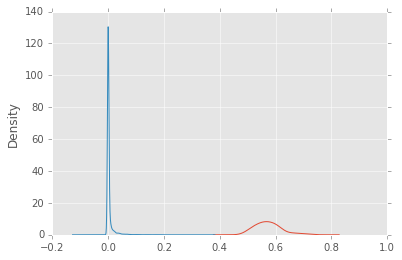

In [85]:
dfsmall['propscore'][dfsmall['SEX'] == 'Male'].plot.kde()
dfsmall['propscore'][dfsmall['SEX'] == 'Female'].plot.kde()

In practice, one can use the logit of the predicted probabilty as a propensity score
The distribution of these scores approaches a normal.

Balance check

* Haviland, Nagin and Rosenbaum (2007) developed absolute standardized difference (Cohen's d) in covariate means.
It is expected to have the Cohen's d statastic be smaller after matching for each attribute.  OK  got it.

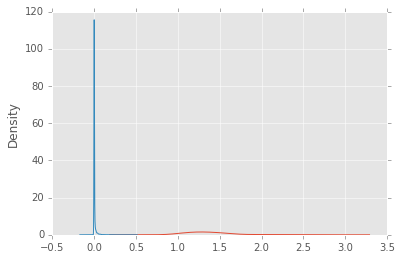

In [89]:
dfsmall['logit'][dfsmall['SEX'] == 'Male'].plot.kde()
dfsmall['logit'][dfsmall['SEX'] == 'Female'].plot.kde()

In [92]:
dfsmall[dfsmall['SEX'] == 'Male'].sort_values('logit',ascending=False).tail(8)

,REG,MAR_STAT,RACEIV,NHIADE,SEX,AGE_DX,YR_BRTH,SEQ_NUM,MDXRECMP,YEAR_DX,...,FIPScombo,ST_CNTY_ORIG,STATE,elevation,lat,lng,ICDOTO9V_description,propscore,propscores,logit
PUBCSNUM,,,,,,,,,,,,,,,,,,,,,
11819569,Connecticut,Married (including common law),White,Non-Spanish-Hispanic-Latino,Male,71,1934,0,Mar,2006,...,09009,09,CT,115.879,41.3267,-72.8043,"Malignant neoplasm of breast (female), unspeci...",0.518821,0.518821,1.078227
11779318,Connecticut,Married (including common law),White,Non-Spanish-Hispanic-Latino,Male,74,1930,0,Jun,2005,...,09009,09,CT,115.879,41.3267,-72.8043,"Malignant neoplasm of breast (female), unspeci...",0.516817,0.516817,1.069609
11742859,Connecticut,Married (including common law),White,Non-Spanish-Hispanic-Latino,Male,64,1939,1,Feb,2004,...,09005,09,CT,1066.8,41.7866,-73.2765,Carcinoma in situ of breast,0.516612,0.516612,1.068730
11812334,Connecticut,Married (including common law),White,"Spanish/Hispanic/Latino, NOS",Male,48,1958,0,Sep,2006,...,09009,09,CT,115.879,41.3267,-72.8043,Malignant neoplasm of other specified sites of...,0.515154,0.515154,1.062510
11742901,Connecticut,Single (never married),White,Non-Spanish-Hispanic-Latino,Male,81,1922,0,Aug,2004,...,09009,09,CT,115.879,41.3267,-72.8043,Carcinoma in situ of breast,0.513524,0.513524,1.055599
11740449,Connecticut,Married (including common law),White,Non-Spanish-Hispanic-Latino,Male,67,1936,0,Mar,2004,...,09003,09,CT,784.126,41.7924,-72.8043,Malignant neoplasm of upper-outer quadrant of ...,0.503026,0.503026,1.012176
11765856,Connecticut,Married (including common law),White,Non-Spanish-Hispanic-Latino,Male,53,1951,0,Mar,2005,...,09009,09,CT,115.879,41.3267,-72.8043,Malignant neoplasm of upper-outer quadrant of ...,0.502385,0.502385,1.009584
11738678,Connecticut,Married (including common law),White,Non-Spanish-Hispanic-Latino,Male,67,1936,1,Nov,2004,...,09001,09,CT,471.481,41.256,-73.3709,Malignant neoplasm of upper-outer quadrant of ...,0.490073,0.490073,0.961066


In [91]:
dfsmall[dfsmall['SEX'] == 'Female'].sort_values('logit',ascending=False).head(8)

,REG,MAR_STAT,RACEIV,NHIADE,SEX,AGE_DX,YR_BRTH,SEQ_NUM,MDXRECMP,YEAR_DX,...,FIPScombo,ST_CNTY_ORIG,STATE,elevation,lat,lng,ICDOTO9V_description,propscore,propscores,logit
PUBCSNUM,,,,,,,,,,,,,,,,,,,,,
11741924,Connecticut,Married (including common law),Unknown,Non-Spanish-Hispanic-Latino,Female,67,1936,0,Mar,2004,...,09003,09,CT,784.126,41.7924,-72.8043,Malignant neoplasm of upper-inner quadrant of ...,0.255205,0.255205,0.342652
11811275,Connecticut,Married (including common law),White,Non-Spanish-Hispanic-Latino,Female,74,1931,0,Mar,2006,...,09005,09,CT,1066.8,41.7866,-73.2765,Carcinoma in situ of breast,0.210974,0.210974,0.267386
11739168,Connecticut,Married (including common law),White,Non-Spanish-Hispanic-Latino,Female,71,1933,0,Dec,2004,...,09003,09,CT,784.126,41.7924,-72.8043,"Malignant neoplasm of breast (female), unspeci...",0.196385,0.196385,0.244376
10586973,Connecticut,Married (including common law),White,Non-Spanish-Hispanic-Latino,Female,46,1966,2,Sep,2012,...,09009,09,CT,115.879,41.3267,-72.8043,Malignant neoplasm of lower-inner quadrant of ...,0.195513,0.195513,0.243028
11754166,Connecticut,Widowed,White,Non-Spanish-Hispanic-Latino,Female,86,1918,0,Aug,2004,...,09003,09,CT,784.126,41.7924,-72.8043,Malignant neoplasm of upper-outer quadrant of ...,0.190777,0.190777,0.235753
11781963,Connecticut,Widowed,White,Non-Spanish-Hispanic-Latino,Female,91,1913,0,Oct,2005,...,09009,09,CT,115.879,41.3267,-72.8043,Carcinoma in situ of breast,0.187231,0.187231,0.230362
11847408,Connecticut,Married (including common law),White,Non-Spanish-Hispanic-Latino,Female,52,1954,0,Aug,2007,...,09007,09,CT,11.188,41.4699,-72.4732,Malignant neoplasm of upper-inner quadrant of ...,0.187187,0.187187,0.230295
11738257,Connecticut,Single (never married),White,Non-Spanish-Hispanic-Latino,Female,94,1910,0,Aug,2004,...,09001,09,CT,471.481,41.256,-73.3709,Malignant neoplasm of upper-outer quadrant of ...,0.184216,0.184216,0.225815


The propensity score is not good because the tree methods for classification are TOO good (they memorize) and the linear reagression ways are just naive and wrong.  
Clustering is proving to be a problem as well (how many clusters, and hierarchical clustering is giving me problems the complete linkage methods, am getting always one big mega cluster and a bunch of singletons.

## Revisit KDTrees

In [94]:
from sklearn.neighbors import KDTree
import numpy as np
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])

In [95]:
kdt = KDTree(X, leaf_size=30, metric='euclidean')

In [96]:
kdt.query(X, k=3, return_distance=True)

(array([[ 0.        ,  1.        ,  2.23606798],
        [ 0.        ,  1.        ,  1.41421356],
        [ 0.        ,  1.41421356,  2.23606798],
        [ 0.        ,  1.        ,  2.23606798],
        [ 0.        ,  1.        ,  1.41421356],
        [ 0.        ,  1.41421356,  2.23606798]]), array([[0, 1, 2],
        [1, 0, 2],
        [2, 1, 0],
        [3, 4, 5],
        [4, 3, 5],
        [5, 4, 3]], dtype=int64))

http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KDTree.html#sklearn.neighbors.KDTree

Query for neighbors within a given radius

In [97]:
print(kdt.query_radius(X[0], r=3, count_only=True))

[4]


C:\Users\ddooling\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [98]:
print(kdt.query_radius(X[0].reshape(1,-1), r=3, count_only=True))

[4]


In [99]:
ind = kdt.query_radius(X[0].reshape(1,-1), r=3)
print(ind)

[array([0, 1, 2, 3], dtype=int64)]


Now make a tree with the SEER data xTrain

In [100]:
plant = KDTree(xTrain, leaf_size=30, metric='euclidean')

In [101]:
plant.query(xTrain, k=3, return_distance=False)

array([[   0, 8409, 7247],
       [   1, 3593, 1664],
       [   2,  177, 5216],
       ..., 
       [8552, 4210,  309],
       [8553, 4799, 5324],
       [8554, 1486, 5795]], dtype=int64)

In [102]:
dfsmall.shape

(8555, 143)

In [111]:
dist4, ind4 = plant.query(xTrain, k=4, return_distance=True)

In [112]:
ind4

array([[   0, 8409, 7247, 5553],
       [   1, 3593, 1664, 4605],
       [   2,  177, 5216, 8451],
       ..., 
       [8552, 4210,  309, 7070],
       [8553, 4799, 5324, 7041],
       [8554, 1486, 5795, 6498]], dtype=int64)

In [113]:
dist4

array([[ 0.        ,  6.46737892,  6.46841337,  7.16191986],
       [ 0.        ,  4.80505006,  5.45886385,  5.55227325],
       [ 0.        ,  4.00028586,  4.61495406,  4.80033511],
       ..., 
       [ 0.        ,  1.90636193,  2.6609236 ,  3.29440198],
       [ 0.        ,  1.84527415,  2.77260599,  2.95543166],
       [ 0.        ,  2.545253  ,  3.19549354,  3.86131528]])

In [114]:
ind4[:,0]

array([   0,    1,    2, ..., 8552, 8553, 8554], dtype=int64)

In [115]:
dfsmall.index

Int64Index([ 7000091,  7000138,  7000314,  7000515,  7000790,  7000799,
             7001553,  7004464,  7004709,  7005175,
            ...
            11851979, 11851992, 11851995, 11852001, 11852009, 11852016,
            11852029, 11852032, 11852063, 11852092],
           dtype='int64', name='PUBCSNUM', length=8555)

In [107]:
ind4.shape

(8555, 4)

In [116]:
dfsmall['nearest'] = pd.Series(ind4[:,0],index=dfsmall.index)

In [124]:
dfsmall['neighbor_1'] = pd.Series(ind4[:,1],index=dfsmall.index)

In [125]:
dfsmall['neighbor_2'] = pd.Series(ind4[:,2],index=dfsmall.index)
dfsmall['neighbor_3'] = pd.Series(ind4[:,3],index=dfsmall.index)

In [132]:
dfsmall['distance_1'] = pd.Series(dist4[:,1],index=dfsmall.index)
dfsmall['distance_2'] = pd.Series(dist4[:,2],index=dfsmall.index)
dfsmall['distance_3'] = pd.Series(dist4[:,3],index=dfsmall.index)

In [117]:
dfsmall['nearest'].head()

PUBCSNUM
7000091    0
7000138    1
7000314    2
7000515    3
7000790    4
Name: nearest, dtype: int64

In [122]:
dfmap = {v: k for k, v in dfsmall['nearest'].to_dict().items()}

In [123]:
dfmap

{0: 7000091,
 1: 7000138,
 2: 7000314,
 3: 7000515,
 4: 7000790,
 5: 7000799,
 6: 7001553,
 7: 7004464,
 8: 7004709,
 9: 7005175,
 10: 7005909,
 11: 7006066,
 12: 7006264,
 13: 7006364,
 14: 7006495,
 15: 7006716,
 16: 7006856,
 17: 7007363,
 18: 7007527,
 19: 7007798,
 20: 7009243,
 21: 7009395,
 22: 7009626,
 23: 7009666,
 24: 7009949,
 25: 7010190,
 26: 7010359,
 27: 7010553,
 28: 7010913,
 29: 7011183,
 30: 7011385,
 31: 7011950,
 32: 7012150,
 33: 7012536,
 34: 7012575,
 35: 7012689,
 36: 7012848,
 37: 7013221,
 38: 7014321,
 39: 7014448,
 40: 7014563,
 41: 7014791,
 42: 7014858,
 43: 7015041,
 44: 7015112,
 45: 7015659,
 46: 7015803,
 47: 7015970,
 48: 7016353,
 49: 7016355,
 50: 7016536,
 51: 7016543,
 52: 7016563,
 53: 7016732,
 54: 7017221,
 55: 7017263,
 56: 7017353,
 57: 7017465,
 58: 7017507,
 59: 7017712,
 60: 7017804,
 61: 7017834,
 62: 7017914,
 63: 7017943,
 64: 7018119,
 65: 7018186,
 66: 7018297,
 67: 7018564,
 68: 7018593,
 69: 7018631,
 70: 7018851,
 71: 7019091,
 7

In [126]:
dfsmall[['neighbor_1','neighbor_2','neighbor_3']].head()

,neighbor_1,neighbor_2,neighbor_3
PUBCSNUM,,,
7000091,8409,7247,5553
7000138,3593,1664,4605
7000314,177,5216,8451
7000515,7350,1093,2425
7000790,7137,7855,8083


In [128]:
replacedict = {}
replacedict['neighbor_1'] = dfmap
replacedict['neighbor_2'] = dfmap
replacedict['neighbor_3'] = dfmap

In [130]:
dfsmall.replace(replacedict,inplace=True)

In [131]:
dfsmall[['neighbor_1','neighbor_2','neighbor_3']].head()

,neighbor_1,neighbor_2,neighbor_3
PUBCSNUM,,,
7000091,11849990,11831212,11810366
7000138,11778892,11740927,11783530
7000314,10604830,11805024,11850472
7000515,11832182,11739028,11743836
7000790,11830046,11840445,11843925


In [133]:
dfsmall[['neighbor_1','distance_1',
        'neighbor_2','distance_2',
        'neighbor_3','distance_3']].head()

,neighbor_1,distance_1,neighbor_2,distance_2,neighbor_3,distance_3
PUBCSNUM,,,,,,
7000091,11849990,6.467379,11831212,6.468413,11810366,7.161920
7000138,11778892,4.805050,11740927,5.458864,11783530,5.552273
7000314,10604830,4.000286,11805024,4.614954,11850472,4.800335
7000515,11832182,5.638090,11739028,6.415753,11743836,6.453640
7000790,11830046,6.212130,11840445,6.278960,11843925,6.354487


Need to identify the nearest 3 neighbors for all of the PUBCSNUM records where SEX == Male:

In [139]:
dfsmall[['neighbor_1','distance_1',
        'neighbor_2','distance_2',
        'neighbor_3','distance_3']][dfsmall['SEX'] == 'Male'].head()

,neighbor_1,distance_1,neighbor_2,distance_2,neighbor_3,distance_3
PUBCSNUM,,,,,,
7012848,11783277,2.449454,11779556,3.283807,11837688,3.372576
10521765,11775701,4.589346,11827510,4.949613,11831731,5.359722
10690330,11837447,3.654978,11836595,3.963937,11783397,4.193521
11737685,11741343,3.807349,11779459,3.827559,11828030,4.042296
11737938,11783585,6.271177,11736307,6.846822,11784386,6.905090


In [145]:
dfsmall[['neighbor_1','SEX']].loc[dfsmall['neighbor_1'].values].head()

,neighbor_1,SEX
PUBCSNUM,,
11849990,11769665,Female
11778892,11778329,Female
10604830,7000314,Female
11832182,11850500,Female
11830046,11825361,Female


In [163]:
def get_gender(x):
    return dfsmall['SEX'].loc[x]

In [164]:
dfsmall['neighbor_1_SEX'] = dfsmall['neighbor_1'].apply(get_gender)

In [166]:
dfsmall['neighbor_2_SEX'] = dfsmall['neighbor_2'].apply(get_gender)

In [167]:
dfsmall['neighbor_3_SEX'] = dfsmall['neighbor_3'].apply(get_gender)

In [169]:
dfsmall[['neighbor_1','distance_1','neighbor_1_SEX',
        'neighbor_2','distance_2','neighbor_2_SEX',
        'neighbor_3','distance_3','neighbor_3_SEX']][dfsmall['SEX'] == 'Male'].head()

,neighbor_1,distance_1,neighbor_1_SEX,neighbor_2,distance_2,neighbor_2_SEX,neighbor_3,distance_3,neighbor_3_SEX
PUBCSNUM,,,,,,,,,
7012848,11783277,2.449454,Female,11779556,3.283807,Female,11837688,3.372576,Female
10521765,11775701,4.589346,Female,11827510,4.949613,Female,11831731,5.359722,Female
10690330,11837447,3.654978,Female,11836595,3.963937,Female,11783397,4.193521,Female
11737685,11741343,3.807349,Female,11779459,3.827559,Female,11828030,4.042296,Female
11737938,11783585,6.271177,Female,11736307,6.846822,Female,11784386,6.905090,Female


In [171]:
dfsmall['neighbor_1_SEX'][dfsmall['SEX'] == 'Male'].value_counts()

Female    62
Name: neighbor_1_SEX, dtype: int64

In [173]:
dfsmall[['neighbor_1_SEX','neighbor_1','distance_1']][dfsmall['SEX'] == 'Male']

,neighbor_1_SEX,neighbor_1,distance_1
PUBCSNUM,,,
7012848,Female,11783277,2.449454
10521765,Female,11775701,4.589346
10690330,Female,11837447,3.654978
11737685,Female,11741343,3.807349
11737938,Female,11783585,6.271177
11738678,Female,11738186,3.038730
11738693,Female,11738017,6.577231
11740197,Female,11740566,3.302016
11740252,Female,11742000,3.385902


In [174]:
dfsmall['SEX'][dfsmall['SEX'] == 'Male'].shape

(62,)

In [159]:
neighbor_1_SEX = dfsmall['SEX'].loc[dfsmall['neighbor_1'].values]

In [160]:
neighbor_1_SEX.shape

(8555,)

In [161]:
dfsmall.shape

(8555, 150)

In [135]:
dfsmall['SEX'].loc[7012848]

'Male'

In [136]:
dfsmall['SEX'].loc[11783277]

'Female'

So they are a match ! 7012848 and 11783277 are a match.

In [137]:
dfsmall['SEX'].loc[10521765]

'Male'

In [138]:
dfsmall['SEX'].loc[11775701]

'Female'

In [140]:
maleindices = dfsmall.index[dfsmall['SEX'] == 'Male']

In [141]:
maleindices

Int64Index([ 7012848, 10521765, 10690330, 11737685, 11737938, 11738678,
            11738693, 11740197, 11740252, 11740300, 11740431, 11740449,
            11740473, 11741463, 11742129, 11742859, 11742901, 11743610,
            11743612, 11765856, 11766349, 11766912, 11769726, 11774088,
            11778184, 11778320, 11779104, 11779318, 11780021, 11782489,
            11782874, 11783054, 11795854, 11798423, 11801178, 11803835,
            11805454, 11808234, 11809739, 11809885, 11812334, 11812434,
            11814466, 11816366, 11819569, 11820516, 11823233, 11825646,
            11825930, 11827718, 11828596, 11829185, 11830759, 11832019,
            11833805, 11838773, 11840348, 11840437, 11841874, 11842438,
            11844118, 11850713],
           dtype='int64', name='PUBCSNUM')

In [142]:
dfsmall.loc[maleindices].shape

(62, 150)

In [154]:
neighbor_1_dict = dfsmall['neighbor_1'].to_dict()

In [162]:
neighbor_1_SEX.sort_index()

PUBCSNUM
7000314     Female
7000515     Female
7000515     Female
7001553     Female
7001553     Female
7004464     Female
7004709     Female
7004709     Female
7005175     Female
7005909     Female
7005909     Female
7005909     Female
7006495     Female
7007527     Female
7007527     Female
7007798     Female
7007798     Female
7007798     Female
7010359     Female
7011183     Female
7012150     Female
7012689     Female
7012848       Male
7015659     Female
7015659     Female
7015803     Female
7015970     Female
7016353     Female
7016732     Female
7017353     Female
             ...  
11851762    Female
11851803    Female
11851812    Female
11851823    Female
11851824    Female
11851827    Female
11851844    Female
11851891    Female
11851891    Female
11851894    Female
11851894    Female
11851915    Female
11851940    Female
11851952    Female
11851972    Female
11851972    Female
11851972    Female
11851979    Female
11851979    Female
11851992    Female
11851995    Female
118

In [175]:
dfclosest = dfsmall[['neighbor_1_SEX','neighbor_1','distance_1']][dfsmall['SEX'] == 'Male'].copy()

In [176]:
dfclosest

,neighbor_1_SEX,neighbor_1,distance_1
PUBCSNUM,,,
7012848,Female,11783277,2.449454
10521765,Female,11775701,4.589346
10690330,Female,11837447,3.654978
11737685,Female,11741343,3.807349
11737938,Female,11783585,6.271177
11738678,Female,11738186,3.038730
11738693,Female,11738017,6.577231
11740197,Female,11740566,3.302016
11740252,Female,11742000,3.385902


In [177]:
closestneighbors = dfclosest['neighbor_1'].values

In [178]:
closestneighbors

array([11783277, 11775701, 11837447, 11741343, 11783585, 11738186,
       11738017, 11740566, 11742000, 11784772, 11737873, 11797965,
       11741177, 11739168, 11743429, 11768729, 11743650, 11764418,
       11741300, 11738281, 11782027, 11851490, 11737802, 11804944,
       11754166, 11778886, 11814955, 11773246, 11743324, 11824507,
       11782721, 11780114, 11776235, 11816110, 11813487, 11801454,
       11828747, 11741382, 11792301, 11737300, 11783288, 11812669,
       11740032, 11805216, 11840269, 11829357, 11828121, 11769702,
       11765872, 11777657, 11742670, 11852063, 11778885, 11739390,
       11846689, 11823967, 11781963, 11740585, 11778886, 11821648,
       11770205, 11847408], dtype=int64)

https://s3.amazonaws.com/quandl-static-content/Documents/Quandl+-+Pandas,+SciPy,+NumPy+Cheat+Sheet.pdf

## Quandl

The Quandl package enables Quandl API access from within Python, which makes acquiring and manipulating numerical data as quick and easy as possible.

In your first Quandl function call you should specifiy your authtoken (found on Quandl's website after signing up) to avoid certain API call limits.  

Quandl is a search engine for numerical data, allowing easy access to financial, social, and demographic data from hundreds of sources. 

See www.quandl.com/help/packages/python for more

* authoken = 'YOURTOKENHERE'    Add the following to any function call
* get('QUANDL/CODE')  Download Quandl data for a certain Quandl code as a DataFrame
* search('searchterm') Search Quandl . Outputs first 4 results
* push(data, code, name)  Upload a Pandas DataFrame (with a time series index) to Quandl. Code must be all capital alphanmeric

### Plotting Example


```
import Quandl as q
import matplotlib.pyplot as plt
rural = q.get(‘WORLDBANK/USA_SP_RUR_TOTL_ZS’)
urban = q.get(‘WORLDBANK/USA_SP_URB_TOTL_IN_ZS’)
plt.subplot(2, 1, 1)
plt.plot(rural.index,rural)
plt.xticks(rural.index[0::3],[])
plt.title(‘American Population’)
plt.ylabel(‘% Rural’)
plt.subplot(2, 1, 2)
plt.plot(urban.index,urban)
plt.xlabel(‘year’)
plt.ylabel(‘% Urban’)
plt.show()
```


My Quandl API key is: aqk8EkA__9pZxH_YaztA



In [182]:
import quandl as q

In [183]:
tok = 'aqk8EkA__9pZxH_YaztA'

In [184]:
rural = q.get('WORLDBANK/USA_SP_RUR_TOTL_ZS',
             authoken=tok)

In [185]:
urban = q.get('WORLDBANK/USA_SP_URB_TOTL_IN_ZS',
             authoken=tok)

In [186]:
type(rural)

pandas.core.frame.DataFrame

In [187]:
rural.head()

,Value
Date,
1960-12-31,30.004
1961-12-31,29.623
1962-12-31,29.243
1963-12-31,28.866
1964-12-31,28.492


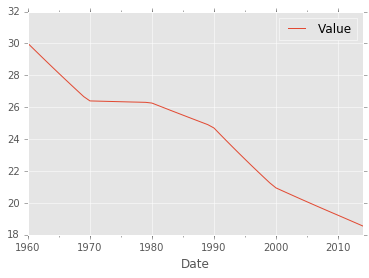

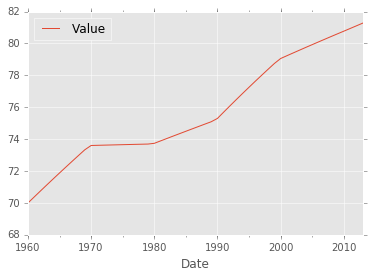

In [189]:
rural.plot()
urban.plot()

In [191]:
nar = q.get('NAR/HOME_PRICES_MEDIAN',api_key=tok)

In [192]:
nar.head()

,U.S.,Northeast,Midwest,South,West
Year,,,,,
2009-12-31,172500.0,240500.0,144100.0,153000.0,211100.0
2010-12-31,172900.0,243500.0,141600.0,150100.0,214800.0
2011-12-31,166100.0,237500.0,135400.0,144200.0,201300.0
2012-12-31,176800.0,237700.0,142700.0,154000.0,230100.0
2013-12-31,197100.0,249100.0,154600.0,170700.0,273100.0


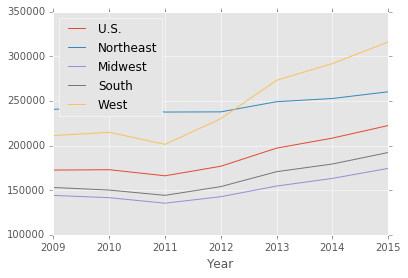

In [193]:
nar.plot()

### New Approach with KDTrees

We need to find a distance threshold and grab all of the control patients that are within this distance threshold for each of the treatment patients.

First make a KDTree that has only the treatment patients in it:

In [194]:
print(resgreat.columns)

Index(['MAR_STAT_Divorced', 'MAR_STAT_Married (including common law)',
       'MAR_STAT_Separated', 'MAR_STAT_Single (never married)',
       'MAR_STAT_Unknown', 'MAR_STAT_Widowed',
       'RACEIV_American Indian, Aleutian, Alaska Native or Eskimo (includes all indigenous populations of the Western hemisphere)',
       'RACEIV_Asian Indian', 'RACEIV_Asian Indian or Pakistani, NOS',
       'RACEIV_Black', 'RACEIV_Chinese', 'RACEIV_Filipino', 'RACEIV_Japanese',
       'RACEIV_Korean', 'RACEIV_Laotian', 'RACEIV_New Guinean', 'RACEIV_Other',
       'RACEIV_Other Asian, including Asian, NOS and Oriental NOS',
       'RACEIV_Pacific Islander, NOS', 'RACEIV_Samoan', 'RACEIV_Thai',
       'RACEIV_Unknown', 'RACEIV_Vietnamese', 'RACEIV_White', 'NHIADE_Cuban',
       'NHIADE_Dominican Republic', 'NHIADE_Mexican',
       'NHIADE_NHIA Surname Match Only', 'NHIADE_Non-Spanish-Hispanic-Latino',
       'NHIADE_Other specified Spanish/Hispanic Origin including Europe',
       'NHIADE_Puerto Rican',
  

In [195]:
maleindices = (dfsmall['SEX'] == 'Male')

In [196]:
resgreatmale = resgreat[maleindices]

But be careful, we want to use the same transformation that is used on the **entire** dataset of both treatment and controls.

In [197]:
xTrain = StandardScaler().fit_transform(xTrain)

In [198]:
scaler = StandardScaler().fit(xTrain)

In [199]:
xTrain = scaler.transform(xTrain)

In [200]:
xTrainMale = resgreatmale.values

In [201]:
xTrainMale = scaler.transform(xTrainMale)

C:\Users\ddooling\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [208]:
kdtMale = KDTree(xTrainMale, leaf_size=30, metric='euclidean')

In [209]:
xTrainMale.shape

(62, 86)

In [211]:
kdtMale.get_tree_stats()

(0, 0, 0)

In [212]:
import numpy as np
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

In [213]:
A = xTrainMale.copy()

In [214]:
D = pdist(A)
D = squareform(D)

In [215]:
N = np.max(D)

In [216]:
N

1057.4986516923836

In [224]:
M = np.min(D)
M

0.0

In [225]:
D

array([[    0.        ,   273.37660444,   862.42144182, ...,
           92.16793933,   266.86282592,   197.46294568],
       [  273.37660444,     0.        ,   595.97662715, ...,
          358.08533475,    46.50806382,   460.98842953],
       [  862.42144182,   595.97662715,     0.        , ...,
          951.13973127,   595.63507294,  1055.6237011 ],
       ..., 
       [   92.16793933,   358.08533475,   951.13973127, ...,
            0.        ,   355.90744157,   107.27673769],
       [  266.86282592,    46.50806382,   595.63507294, ...,
          355.90744157,     0.        ,   460.84632163],
       [  197.46294568,   460.98842953,  1055.6237011 , ...,
          107.27673769,   460.84632163,     0.        ]])

In [218]:
print(kdtMale.query_radius(xTrainMale[0].reshape(1,-1), r=1060, count_only=True))

[62]


In [220]:
for i in range(62):
    print(kdtMale.query_radius(xTrainMale[i].reshape(1,-1), r=1055, count_only=True))

[62]
[62]
[54]
[62]
[62]
[62]
[62]
[57]
[57]
[62]
[62]
[62]
[57]
[62]
[62]
[54]
[62]
[62]
[62]
[62]
[62]
[62]
[62]
[62]
[62]
[57]
[62]
[62]
[62]
[57]
[62]
[62]
[62]
[54]
[62]
[62]
[54]
[62]
[54]
[62]
[62]
[62]
[62]
[57]
[62]
[62]
[62]
[62]
[62]
[62]
[62]
[62]
[62]
[62]
[62]
[57]
[62]
[62]
[62]
[62]
[62]
[57]


OK, so let's just use 1000 as the cutoff.

In [221]:
kdtAll = KDTree(xTrain, leaf_size=30, metric='euclidean')

In [230]:
kdtAll.query_radius(xTrain, 10., count_only=True)

array([ 498, 4098, 3628, ..., 6385, 6277, 6058], dtype=int64)

In [229]:
dfsmall.shape

(8555, 153)

In [231]:
kdtAll.get_tree_stats()

(0, 0, 0)

In [232]:
xTrain.shape

(8555, 86)